# **MSIS 2508 Final Project Code: Group 3**

## **Library Imports**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

## **Data Imports**

In [4]:
realestate = pd.read_csv('RealEstate_California.csv')

In [5]:
zipCode = pd.read_csv('ZipCode.csv')

In [6]:
realestate = realestate.merge(zipCode, left_on='zipcode', right_on='zip')

## **Data Cleaning/Dropping Values**

In [7]:
realestate.isna().sum()

Unnamed: 0              0
id                      0
stateId                 0
countyId                0
cityId                  0
country                 0
datePostedString        3
is_bankOwned            0
is_forAuction           0
event                   0
time                  288
price                   0
pricePerSquareFoot      0
city_x                  0
state                   0
yearBuilt               0
streetAddress           0
zipcode                 0
longitude               0
latitude                0
hasBadGeocode           0
description           279
currency                0
livingArea              0
livingAreaValue         0
lotAreaUnits            0
bathrooms               0
bedrooms                0
buildingArea            0
parking                 0
garageSpaces            0
hasGarage               0
levels                  0
pool                    0
spa                     0
isNewConstruction       0
hasPetsAllowed          0
homeType                0
county_x    

In [8]:
realestate.parking.value_counts()

1    22998
0    12236
Name: parking, dtype: int64

In [9]:
realestate.dropna(inplace=True)

In [10]:
realestate.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county_x,zip,city_y,county_y,pop
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0,0,0,LOT,Placer County,95717,Gold Run,Placer,176
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,0,0,0,0,SINGLE_FAMILY,Contra Costa County,94564,Pinole,Contra Costa,19260
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,0,0,0,0,SINGLE_FAMILY,Contra Costa County,94564,Pinole,Contra Costa,19260
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,0,1,0,0,SINGLE_FAMILY,Contra Costa County,94564,Pinole,Contra Costa,19260
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0,0,0,LOT,Contra Costa County,94564,Pinole,Contra Costa,19260


In [11]:
realestate.drop(columns = ['Unnamed: 0', 'zip','county_y'], inplace = True)

## **Preprocessing and Creating New Variables**

In [12]:
from datetime import datetime
realestate['datePostedString'] = pd.to_datetime(realestate['datePostedString'])

In [13]:
realestate['bed_bath_rooms'] = realestate.bedrooms * realestate.bathrooms

In [14]:
realestate.head()

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county_x,city_y,pop,bed_bath_rooms
0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,1.610496e+12,...,0,0,0,0,0,LOT,Placer County,Gold Run,176,0.0
1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,1.626048e+12,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,Pinole,19260,6.0
2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,1.625702e+12,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,Pinole,19260,6.0
3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,Pinole,19260,6.0
4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,0,0,0,0,0,LOT,Contra Costa County,Pinole,19260,0.0


In [15]:
import numpy as np
realestate.homeType.value_counts()

SINGLE_FAMILY    21974
LOT               5723
CONDO             3430
MULTI_FAMILY      2395
TOWNHOUSE         1163
APARTMENT            1
Name: homeType, dtype: int64

In [16]:
citys = realestate.city_x.value_counts().head(50).index.tolist()

In [17]:
realestate = realestate.loc[realestate.city_x.isin(citys)]
realestate.shape

(12192, 41)

In [18]:
realestate = realestate[realestate.homeType != 'LOT']
realestate.shape

(11516, 41)

In [19]:
realestate[['levels','homeType']].head(10)

,levels,homeType
17,One,CONDO
18,One,SINGLE_FAMILY
19,One,SINGLE_FAMILY
21,0,SINGLE_FAMILY
22,One,SINGLE_FAMILY
23,One,SINGLE_FAMILY
24,One,SINGLE_FAMILY
25,Three Or More,MULTI_FAMILY
26,One,SINGLE_FAMILY
27,One,CONDO


In [20]:
realestate.levels.value_counts()

0                                      4493
One                                    3376
Two                                    2194
Three Or More                           397
One Story                               307
Two Story                               213
Multi/Split                             181
One Story-One                            80
Three or More Stories                    54
One-Two                                  44
Two Story-Two                            40
Tri-Level                                23
Three or More Stories-Three Or More      14
Two-Multi/Split                          13
Four                                     13
Two Story-One                             9
Other                                     8
Three Or More-Multi/Split                 8
Two-Three Or More                         7
Two Story-Three Or More                   5
Three or More Stories-One                 5
Other-One                                 5
Tri-Level-Three Or More         

In [21]:
realestate['levels'] = realestate['levels'].astype(str)
realestate['levels'] = realestate['levels'].replace(['0','One Story', '1', 'One Story-Two', 'One-Three Or More',
                                                     'One Story-Three Or More','One Story-One','One-Two'],'One')
realestate['levels'] = realestate['levels'].replace(['Two Story-Two', 'Two Story', '2', 'Two-One','Two-Three Or More', 'Two Story-One', 'Two Story-Three Or More'],'Two')
realestate['levels'] = realestate['levels'].replace(['3', 'Three','Three or More Stories', 'Three or More Stories-Three Or More',
                                                     '4+', 'Three or More Stories-One-Two', 'Three or More Stories-One',
                                                     'Three Or More-Two', 'Other', 'Other-One', 'Five or More',
                                                     'Four', 'One-Two-Three Or More', 'Three or More Stories-Two'],'Three Or More')
realestate.levels.value_counts()

One                              8305
Two                              2468
Three Or More                     502
Multi/Split                       181
Tri-Level                          23
Two-Multi/Split                    13
Three Or More-Multi/Split           8
Multi/Split-Tri-Level               3
Multi/Split-Two                     3
One-Multi/Split                     3
Tri-Level-Three Or More             3
Three Or More-Split Level           2
Two-Three Or More-Multi/Split       1
Multi/Split-Three Or More           1
Name: levels, dtype: int64

In [22]:
realestate['Multi/Split'] = np.where((realestate.levels.str.contains('Multi/Split') |
                                     realestate.levels.str.contains('Tri-Level') |
                                     realestate.levels.str.contains('Split Level') |
                                     realestate.levels.str.contains('Multi-Level')),1, 0)

In [23]:
realestate['Multi/Split'].value_counts()

0    11275
1      241
Name: Multi/Split, dtype: int64

In [24]:
#Assumed split and multi level homes with no value attributed to them are two level houses
realestate['levels'] = realestate['levels'].replace(['One-Multi/Split','Multi/Split-One','One-Two-Multi/Split'],'One')
realestate['levels'] = realestate['levels'].replace(['Two-Multi/Split','Multi/Split-Two','Multi/Split','Multi-Level','Split Level'],'Two')
realestate['levels'] = realestate['levels'].replace(['Tri-Level','Three Or More-Multi/Split', 'Tri-Level-Three Or More', 'Tri-Level-Two',
                                                     'Three Or More-Split Level', 'Multi/Split-Tri-Level','Two-Three Or More-Multi/Split',
                                                     'Multi/Split-Three Or More'],'Three Or More')
realestate.levels.value_counts()

One              8308
Two              2665
Three Or More     543
Name: levels, dtype: int64

In [25]:
realestate.homeType.value_counts()

SINGLE_FAMILY    7630
CONDO            1944
MULTI_FAMILY     1444
TOWNHOUSE         497
APARTMENT           1
Name: homeType, dtype: int64

In [26]:
finalday = realestate.datePostedString.max()

In [27]:
realestate['daysonmarket'] = (finalday-realestate['datePostedString']).dt.days

In [28]:
realestate[['daysonmarket']]

,daysonmarket
17,1
18,1
19,1
21,5
22,5
...,...
35173,9
35174,10
35175,11
35176,11


In [29]:
realestate['daysonmarket2'] = pd.to_numeric(realestate['daysonmarket'])

In [30]:
realestate = pd.get_dummies(realestate, columns=['homeType'])

In [31]:
realestate['bed_bath_rooms'] = realestate.bedrooms * realestate.bathrooms

In [32]:
realestate.head()

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,pop,bed_bath_rooms,Multi/Split,daysonmarket,daysonmarket2,homeType_APARTMENT,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
17,91605-2069586184,9,555,12447,USA,2021-07-13,0,0,Listed for sale,1.626134e+12,...,53113,2.0,0,1,1,0,1,0,0,0
18,91605-20000583,9,556,12447,USA,2021-07-13,0,0,Listed for sale,1.626134e+12,...,53113,3.0,0,1,1,0,0,0,1,0
19,91605-19998959,9,557,12447,USA,2021-07-13,0,0,Listed for sale,1.626048e+12,...,53113,20.0,0,1,1,0,0,0,1,0
21,91605-19997810,9,559,12447,USA,2021-07-09,0,0,Listed for sale,1.625789e+12,...,53113,6.0,0,5,5,0,0,0,1,0
22,91605-19996997,9,560,12447,USA,2021-07-09,0,0,Listed for sale,1.625789e+12,...,53113,6.0,0,5,5,0,0,0,1,0


In [33]:
realestate.columns

Index(['id', 'stateId', 'countyId', 'cityId', 'country', 'datePostedString',
       'is_bankOwned', 'is_forAuction', 'event', 'time', 'price',
       'pricePerSquareFoot', 'city_x', 'state', 'yearBuilt', 'streetAddress',
       'zipcode', 'longitude', 'latitude', 'hasBadGeocode', 'description',
       'currency', 'livingArea', 'livingAreaValue', 'lotAreaUnits',
       'bathrooms', 'bedrooms', 'buildingArea', 'parking', 'garageSpaces',
       'hasGarage', 'levels', 'pool', 'spa', 'isNewConstruction',
       'hasPetsAllowed', 'county_x', 'city_y', 'pop', 'bed_bath_rooms',
       'Multi/Split', 'daysonmarket', 'daysonmarket2', 'homeType_APARTMENT',
       'homeType_CONDO', 'homeType_MULTI_FAMILY', 'homeType_SINGLE_FAMILY',
       'homeType_TOWNHOUSE'],
      dtype='object')

In [34]:
realestate = pd.get_dummies(realestate, columns=['levels'])

In [35]:
realestate.head(10)

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,daysonmarket,daysonmarket2,homeType_APARTMENT,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,levels_One,levels_Three Or More,levels_Two
17,91605-2069586184,9,555,12447,USA,2021-07-13,0,0,Listed for sale,1.626134e+12,...,1,1,0,1,0,0,0,1,0,0
18,91605-20000583,9,556,12447,USA,2021-07-13,0,0,Listed for sale,1.626134e+12,...,1,1,0,0,0,1,0,1,0,0
19,91605-19998959,9,557,12447,USA,2021-07-13,0,0,Listed for sale,1.626048e+12,...,1,1,0,0,0,1,0,1,0,0
21,91605-19997810,9,559,12447,USA,2021-07-09,0,0,Listed for sale,1.625789e+12,...,5,5,0,0,0,1,0,1,0,0
22,91605-19996997,9,560,12447,USA,2021-07-09,0,0,Listed for sale,1.625789e+12,...,5,5,0,0,0,1,0,1,0,0
23,91605-20002196,9,561,12447,USA,2021-07-08,0,0,Listed for sale,1.625702e+12,...,6,6,0,0,0,1,0,1,0,0
24,91605-20000621,9,562,12447,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,7,7,0,0,0,1,0,1,0,0
25,91605-20004289,9,563,12447,USA,2021-07-05,0,0,Price change,1.625616e+12,...,9,9,0,0,1,0,0,0,1,0
26,91605-20006480,9,564,12447,USA,2021-07-01,0,0,Listed for sale,1.625184e+12,...,13,13,0,0,0,1,0,1,0,0
27,91605-20003751,9,565,12447,USA,2021-07-01,0,0,Listed for sale,1.625098e+12,...,13,13,0,1,0,0,0,1,0,0


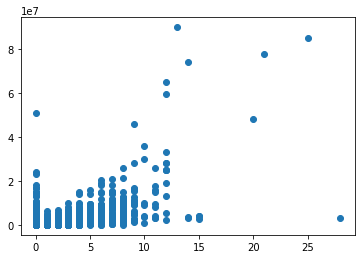

In [36]:
plt.scatter(realestate['bathrooms'], realestate['price'])

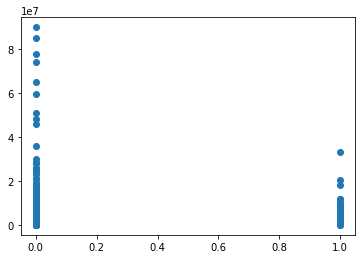

In [37]:
plt.scatter(realestate['Multi/Split'], realestate['price'])

Setting house price to be above $0 for better predictions (no house is free!)

In [38]:
realestate = realestate[realestate.price>0]

## **Linear Regression and OLS Models**

In [39]:
from sklearn.model_selection import train_test_split
X1 = realestate[['bathrooms','pool','spa','parking','garageSpaces','hasPetsAllowed','hasGarage','daysonmarket2',
                	'homeType_CONDO',	'homeType_MULTI_FAMILY',	'homeType_SINGLE_FAMILY','bed_bath_rooms','levels_One', 'levels_Three Or More','Multi/Split', 'livingAreaValue', 'pop']]
y1 = (realestate.price)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, train_size = .75, random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import statsmodels.api as sm
linreg = LinearRegression()
scaler = StandardScaler()
minscaler = MinMaxScaler()
robust = RobustScaler()
X_train1_scaled = minscaler.fit_transform(X_train1)
X_test1_scaled = minscaler.transform(X_test1)
X_train1_scaled = sm.add_constant(X_train1_scaled)
X_test1_scaled = sm.add_constant(X_test1_scaled)

C:\Users\Manasvini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Manasvini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [41]:
model = sm.OLS(y_train1, X_train1_scaled)

In [42]:
features = ['const','bathrooms','pool','spa','parking','garageSpaces','hasPetsAllowed','hasGarage','daysonmarket2',
                 	'homeType_CONDO',	'homeType_MULTI_FAMILY',	'homeType_SINGLE_FAMILY','bed_bath_rooms','levels_One', 'levels_Three Or More','Multi/Split', 'livingAreaValue', 'pop']

In [43]:
results = model.fit()
print(results.summary(xname=features))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     400.4
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:00:49   Log-Likelihood:            -1.3767e+05
No. Observations:                8633   AIC:                         2.754e+05
Df Residuals:                    8615   BIC:                         2.755e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.31

In [44]:
X_train1_scaled = minscaler.fit_transform(X_train1)
X_test1_scaled = minscaler.transform(X_test1)
linreg.fit(X_train1_scaled, y_train1)
linreg.score(X_test1_scaled, y_test1)

0.11896869436112079

## **Lasso Regression**

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.model_selection import GridSearchCV
pipe2 = make_pipeline(MinMaxScaler(),Lasso(max_iter=1000, tol=1e2))
param_grid = {'lasso__alpha': np.logspace(1,5,10)}
grid2 = GridSearchCV(pipe2, param_grid, cv=5, return_train_score=True)
grid2.fit(X1, y1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('lasso', Lasso(tol=100.0))]),
             param_grid={'lasso__alpha': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             return_train_score=True)

In [46]:
grid2.best_params_

{'lasso__alpha': 35938.13663804626}

In [47]:
grid2.best_score_

0.21281556515800643

In [48]:
lasso = Lasso(alpha=grid2.best_params_['lasso__alpha'], tol=1e2)
lasso.fit(X_train1_scaled, y_train1)

Lasso(alpha=35938.13663804626, tol=100.0)

In [49]:
lasso.score(X_test1_scaled, y_test1)

0.24831784738894447

In [50]:
features = ['bathrooms','pool','spa','parking','garageSpaces','hasPetsAllowed','hasGarage','daysonmarket2',
                	'homeType_CONDO',	'homeType_MULTI_FAMILY',	'homeType_SINGLE_FAMILY','bed_bath_rooms','levels_One', 'levels_Three Or More','Multi/Split', 'livingAreaValue', 'pop']
pd.Series(lasso.coef_,index= features).sort_values(ascending=False)

livingAreaValue           1.131987e+07
bathrooms                 1.057644e+07
homeType_MULTI_FAMILY     8.254292e+05
pool                      3.187644e+05
levels_Three Or More      1.040431e+05
Multi/Split               0.000000e+00
spa                       0.000000e+00
garageSpaces              0.000000e+00
hasPetsAllowed            0.000000e+00
hasGarage                 0.000000e+00
daysonmarket2             0.000000e+00
homeType_SINGLE_FAMILY    0.000000e+00
bed_bath_rooms            0.000000e+00
levels_One               -0.000000e+00
homeType_CONDO           -1.881336e+05
parking                  -4.779299e+05
pop                      -6.098796e+05
dtype: float64

## **Ridge Regression**

In [51]:
pipe3 = make_pipeline(PolynomialFeatures(degree=1),MinMaxScaler(),Ridge(max_iter=1000))
param_grid = {'ridge__alpha': np.logspace(1,5,10)}
grid3 = GridSearchCV(pipe3, param_grid, cv=10, return_train_score=True)
grid3.fit(X1, y1)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=1)),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('ridge', Ridge(max_iter=1000))]),
             param_grid={'ridge__alpha': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             return_train_score=True)

In [52]:
grid3.best_score_

0.16520860957756095

In [53]:
grid3.best_params_

{'ridge__alpha': 77.4263682681127}

In [54]:
ridge = Ridge(alpha=grid3.best_params_['ridge__alpha'], tol=1e2)
ridge.fit(X_train1_scaled, y_train1)

Ridge(alpha=77.4263682681127, tol=100.0)

In [55]:
ridge.score(X_test1_scaled, y_test1)

0.2254396828866434

In [56]:
features = ['bathrooms','pool','spa','parking','garageSpaces','hasPetsAllowed','hasGarage','daysonmarket2',
                	'homeType_CONDO',	'homeType_MULTI_FAMILY',	'homeType_SINGLE_FAMILY','bed_bath_rooms','levels_One', 'levels_Three Or More','Multi/Split', 'livingAreaValue', 'pop']
pd.Series(ridge.coef_,index= features).sort_values(ascending=False)

livingAreaValue           5.533169e+06
bathrooms                 4.805065e+06
homeType_MULTI_FAMILY     1.123374e+06
garageSpaces              7.940773e+05
bed_bath_rooms            7.814466e+05
levels_Three Or More      7.601390e+05
pool                      6.324546e+05
spa                       4.804709e+05
hasPetsAllowed            4.646443e+05
hasGarage                 3.602135e+05
homeType_SINGLE_FAMILY    3.549237e+05
daysonmarket2             2.626793e+05
Multi/Split               2.500425e+05
levels_One                8.664310e+04
homeType_CONDO           -1.404767e+05
parking                  -8.338257e+05
pop                      -1.765488e+06
dtype: float64

## **Decision Trees**

In [57]:
def expensive_category(x):
  if x>1000000:
    return 1
  else:
    return 0

In [58]:
realestate['Expense_Cat'] = realestate.price.apply(expensive_category)

In [59]:
realestate[['price','Expense_Cat']].head()

,price,Expense_Cat
17,274950.0,0
18,645000.0,0
19,1200000.0,1
21,650000.0,0
22,749000.0,0


In [60]:
from sklearn import tree

In [61]:
X1 = realestate[['bathrooms','pool','spa','parking','garageSpaces','hasPetsAllowed','hasGarage','daysonmarket2',
                	'homeType_CONDO',	'homeType_MULTI_FAMILY',	'homeType_SINGLE_FAMILY','bed_bath_rooms','levels_One', 'levels_Three Or More','Multi/Split', 'pop']]

In [62]:
y1 = realestate['Expense_Cat']

In [63]:
pipe4 = make_pipeline(DecisionTreeClassifier(random_state=0))
param_grid = {'decisiontreeclassifier__max_leaf_nodes':[15,16,17,18],
              'decisiontreeclassifier__max_depth':[3,4,5,6]}
grid4 = GridSearchCV(pipe4, param_grid, cv=5, return_train_score=True)
grid4.fit(X1, y1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=0))]),
             param_grid={'decisiontreeclassifier__max_depth': [3, 4, 5, 6],
                         'decisiontreeclassifier__max_leaf_nodes': [15, 16, 17,
                                                                    18]},
             return_train_score=True)

In [64]:
grid4.best_params_

{'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__max_leaf_nodes': 18}

In [65]:
grid4.best_score_

0.7607539442565943

In [66]:
clf = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=18)

In [67]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, train_size = .75, random_state=0)

In [68]:
clf.fit(X_train1,y_train1)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=18)

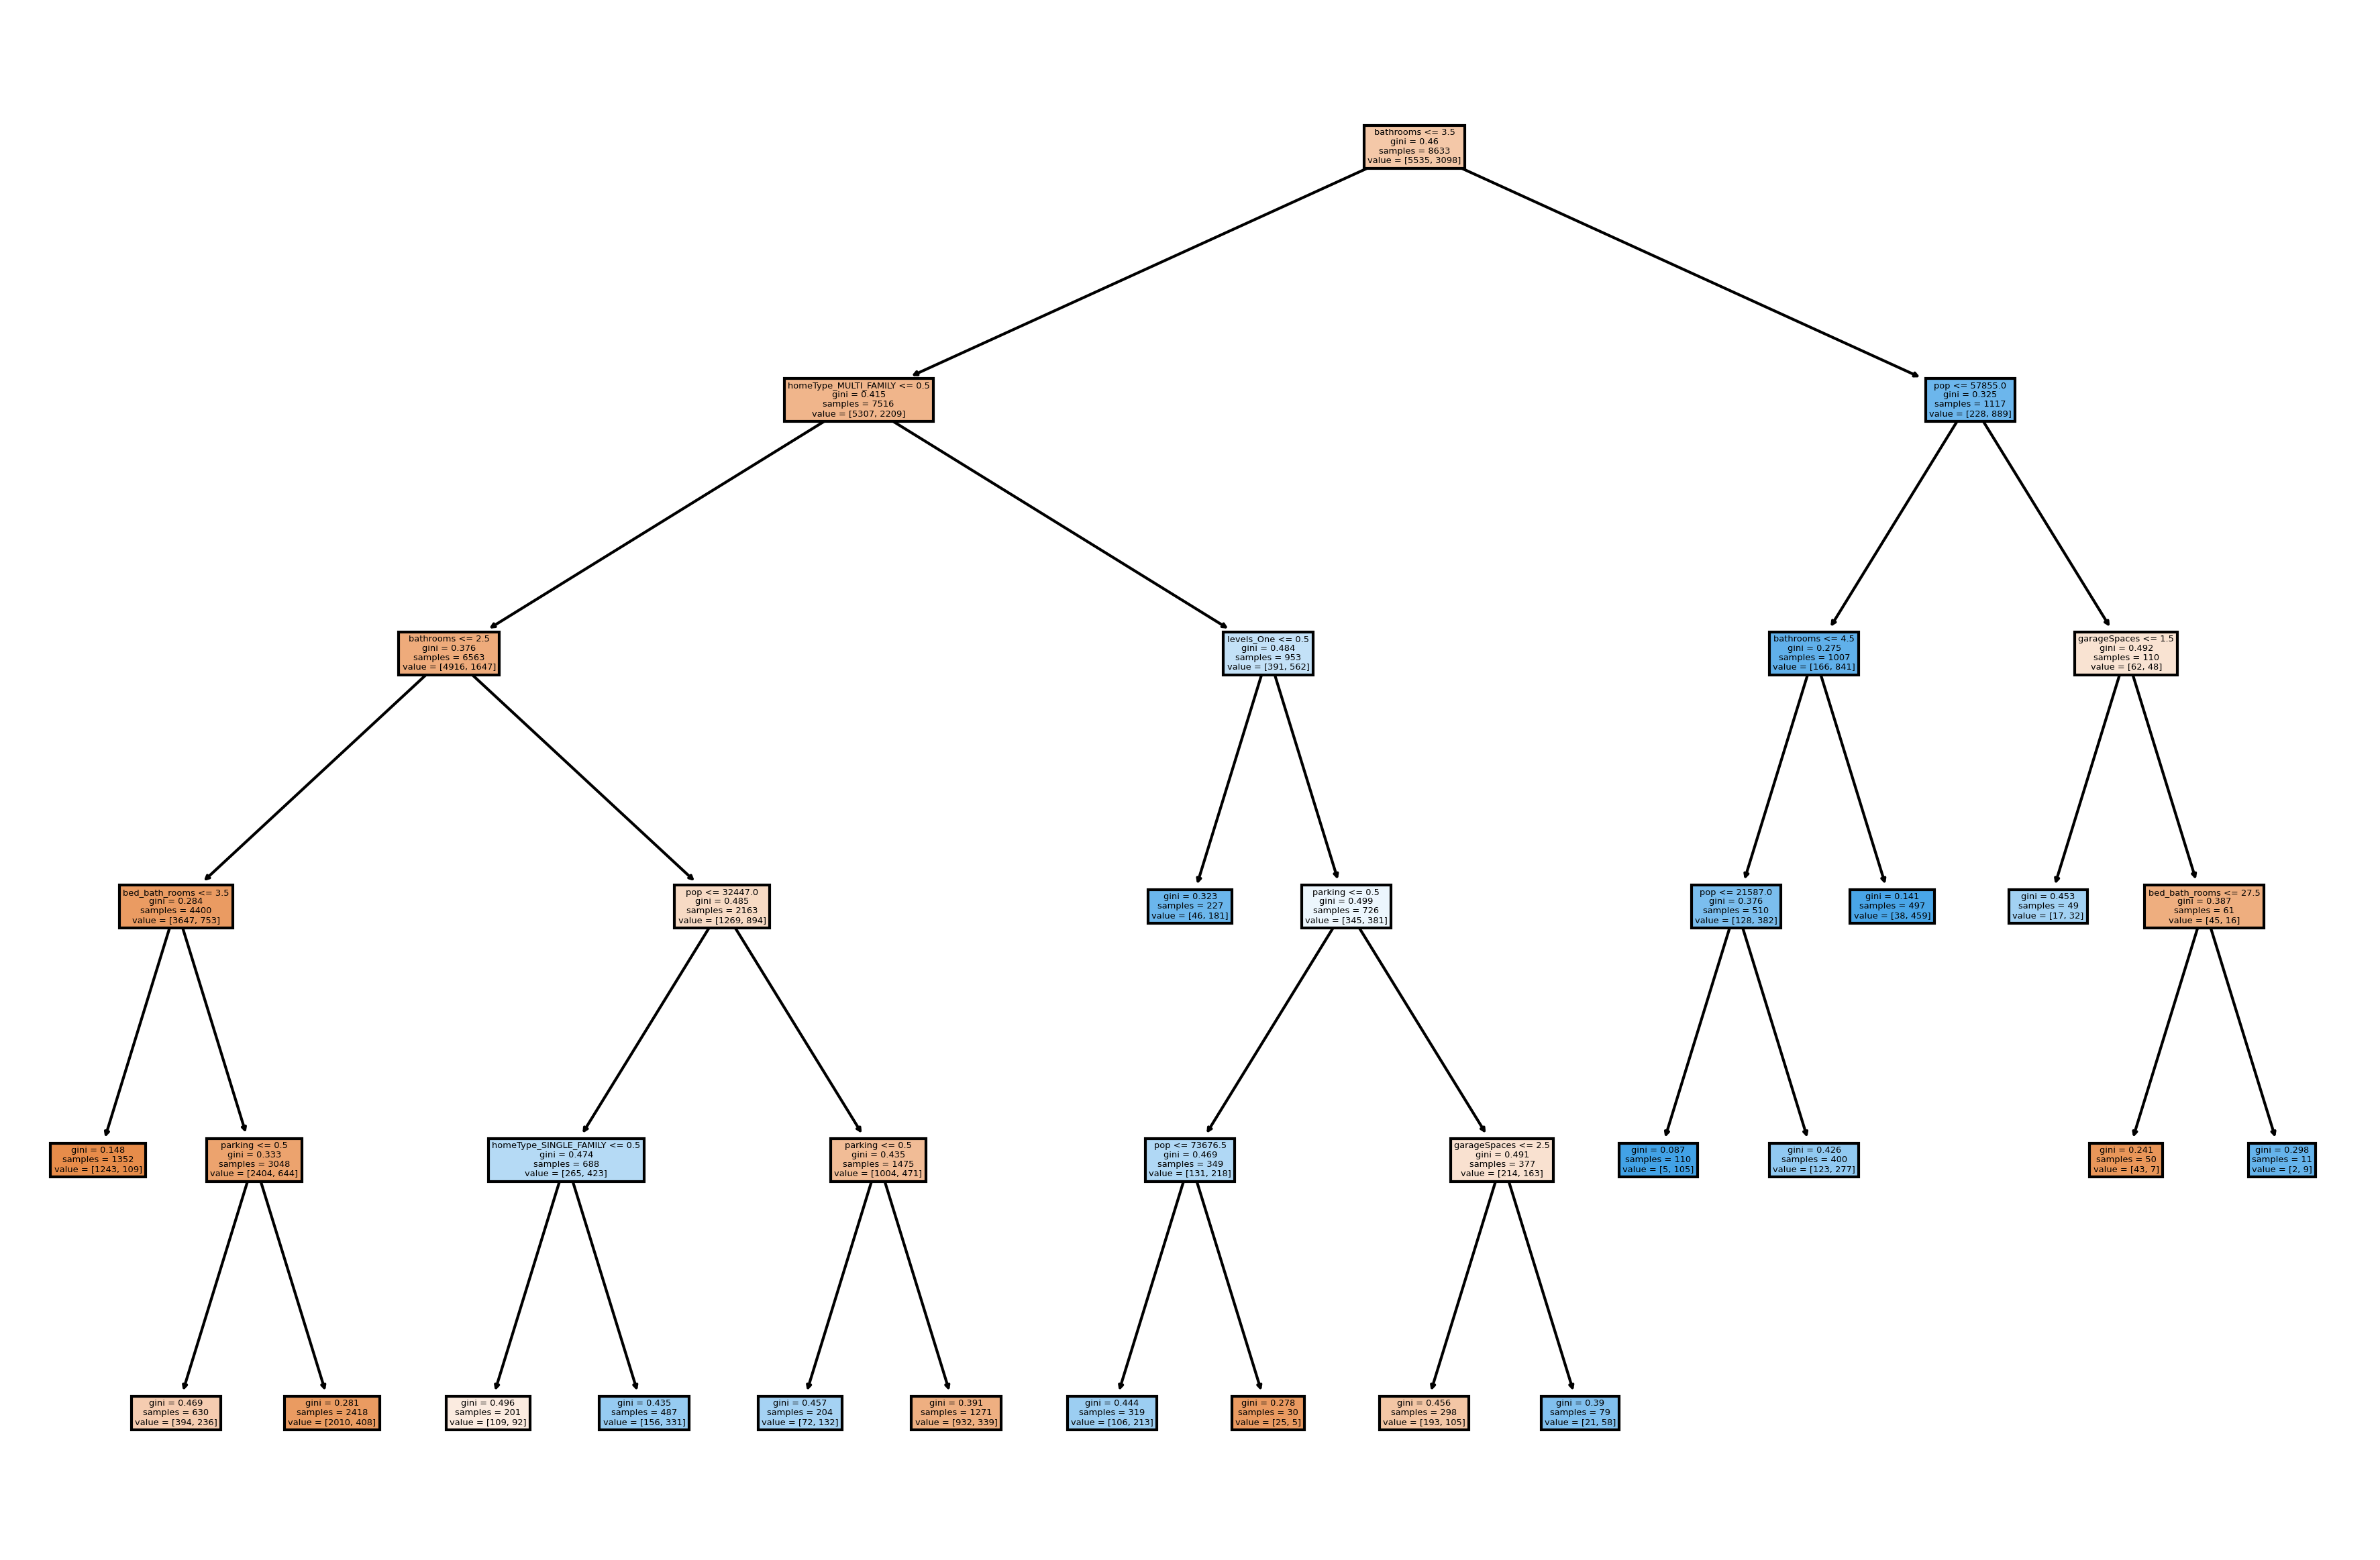

In [69]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10),dpi=300)
tree_dot = plot_tree(clf, feature_names = X1.columns.values, filled=True)

In [70]:
feature_names = ['bathrooms','pool','spa','parking','garageSpaces','hasPetsAllowed','hasGarage','daysonmarket2',
                	'homeType_CONDO',	'homeType_MULTI_FAMILY',	'homeType_SINGLE_FAMILY','bed_bath_rooms','levels_One', 'levels_Three Or More','Multi/Split','pop']
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
forest_importances

bathrooms                 0.554282
homeType_MULTI_FAMILY     0.156720
pop                       0.114131
parking                   0.087486
bed_bath_rooms            0.033046
garageSpaces              0.021749
levels_One                0.021083
homeType_SINGLE_FAMILY    0.011503
pool                      0.000000
spa                       0.000000
hasPetsAllowed            0.000000
hasGarage                 0.000000
daysonmarket2             0.000000
homeType_CONDO            0.000000
levels_Three Or More      0.000000
Multi/Split               0.000000
dtype: float64

## **Random Forest Model**

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
pipe5 = make_pipeline(RandomForestClassifier(random_state=42))
param_grid = {'randomforestclassifier__max_features':[5,6,7],
              'randomforestclassifier__max_depth':[3,4,5]}
grid5 = GridSearchCV(pipe5, param_grid, cv=5, return_train_score=True, scoring='roc_auc')
grid5.fit(X1,y1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [3, 4, 5],
                         'randomforestclassifier__max_features': [5, 6, 7]},
             return_train_score=True, scoring='roc_auc')

In [73]:
grid5.best_params_

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__max_features': 7}

In [74]:
grid5.best_score_

0.800628599364711

In [75]:
clf2 = RandomForestClassifier(max_depth=5, max_features=7)

In [76]:
clf2.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=5, max_features=7)

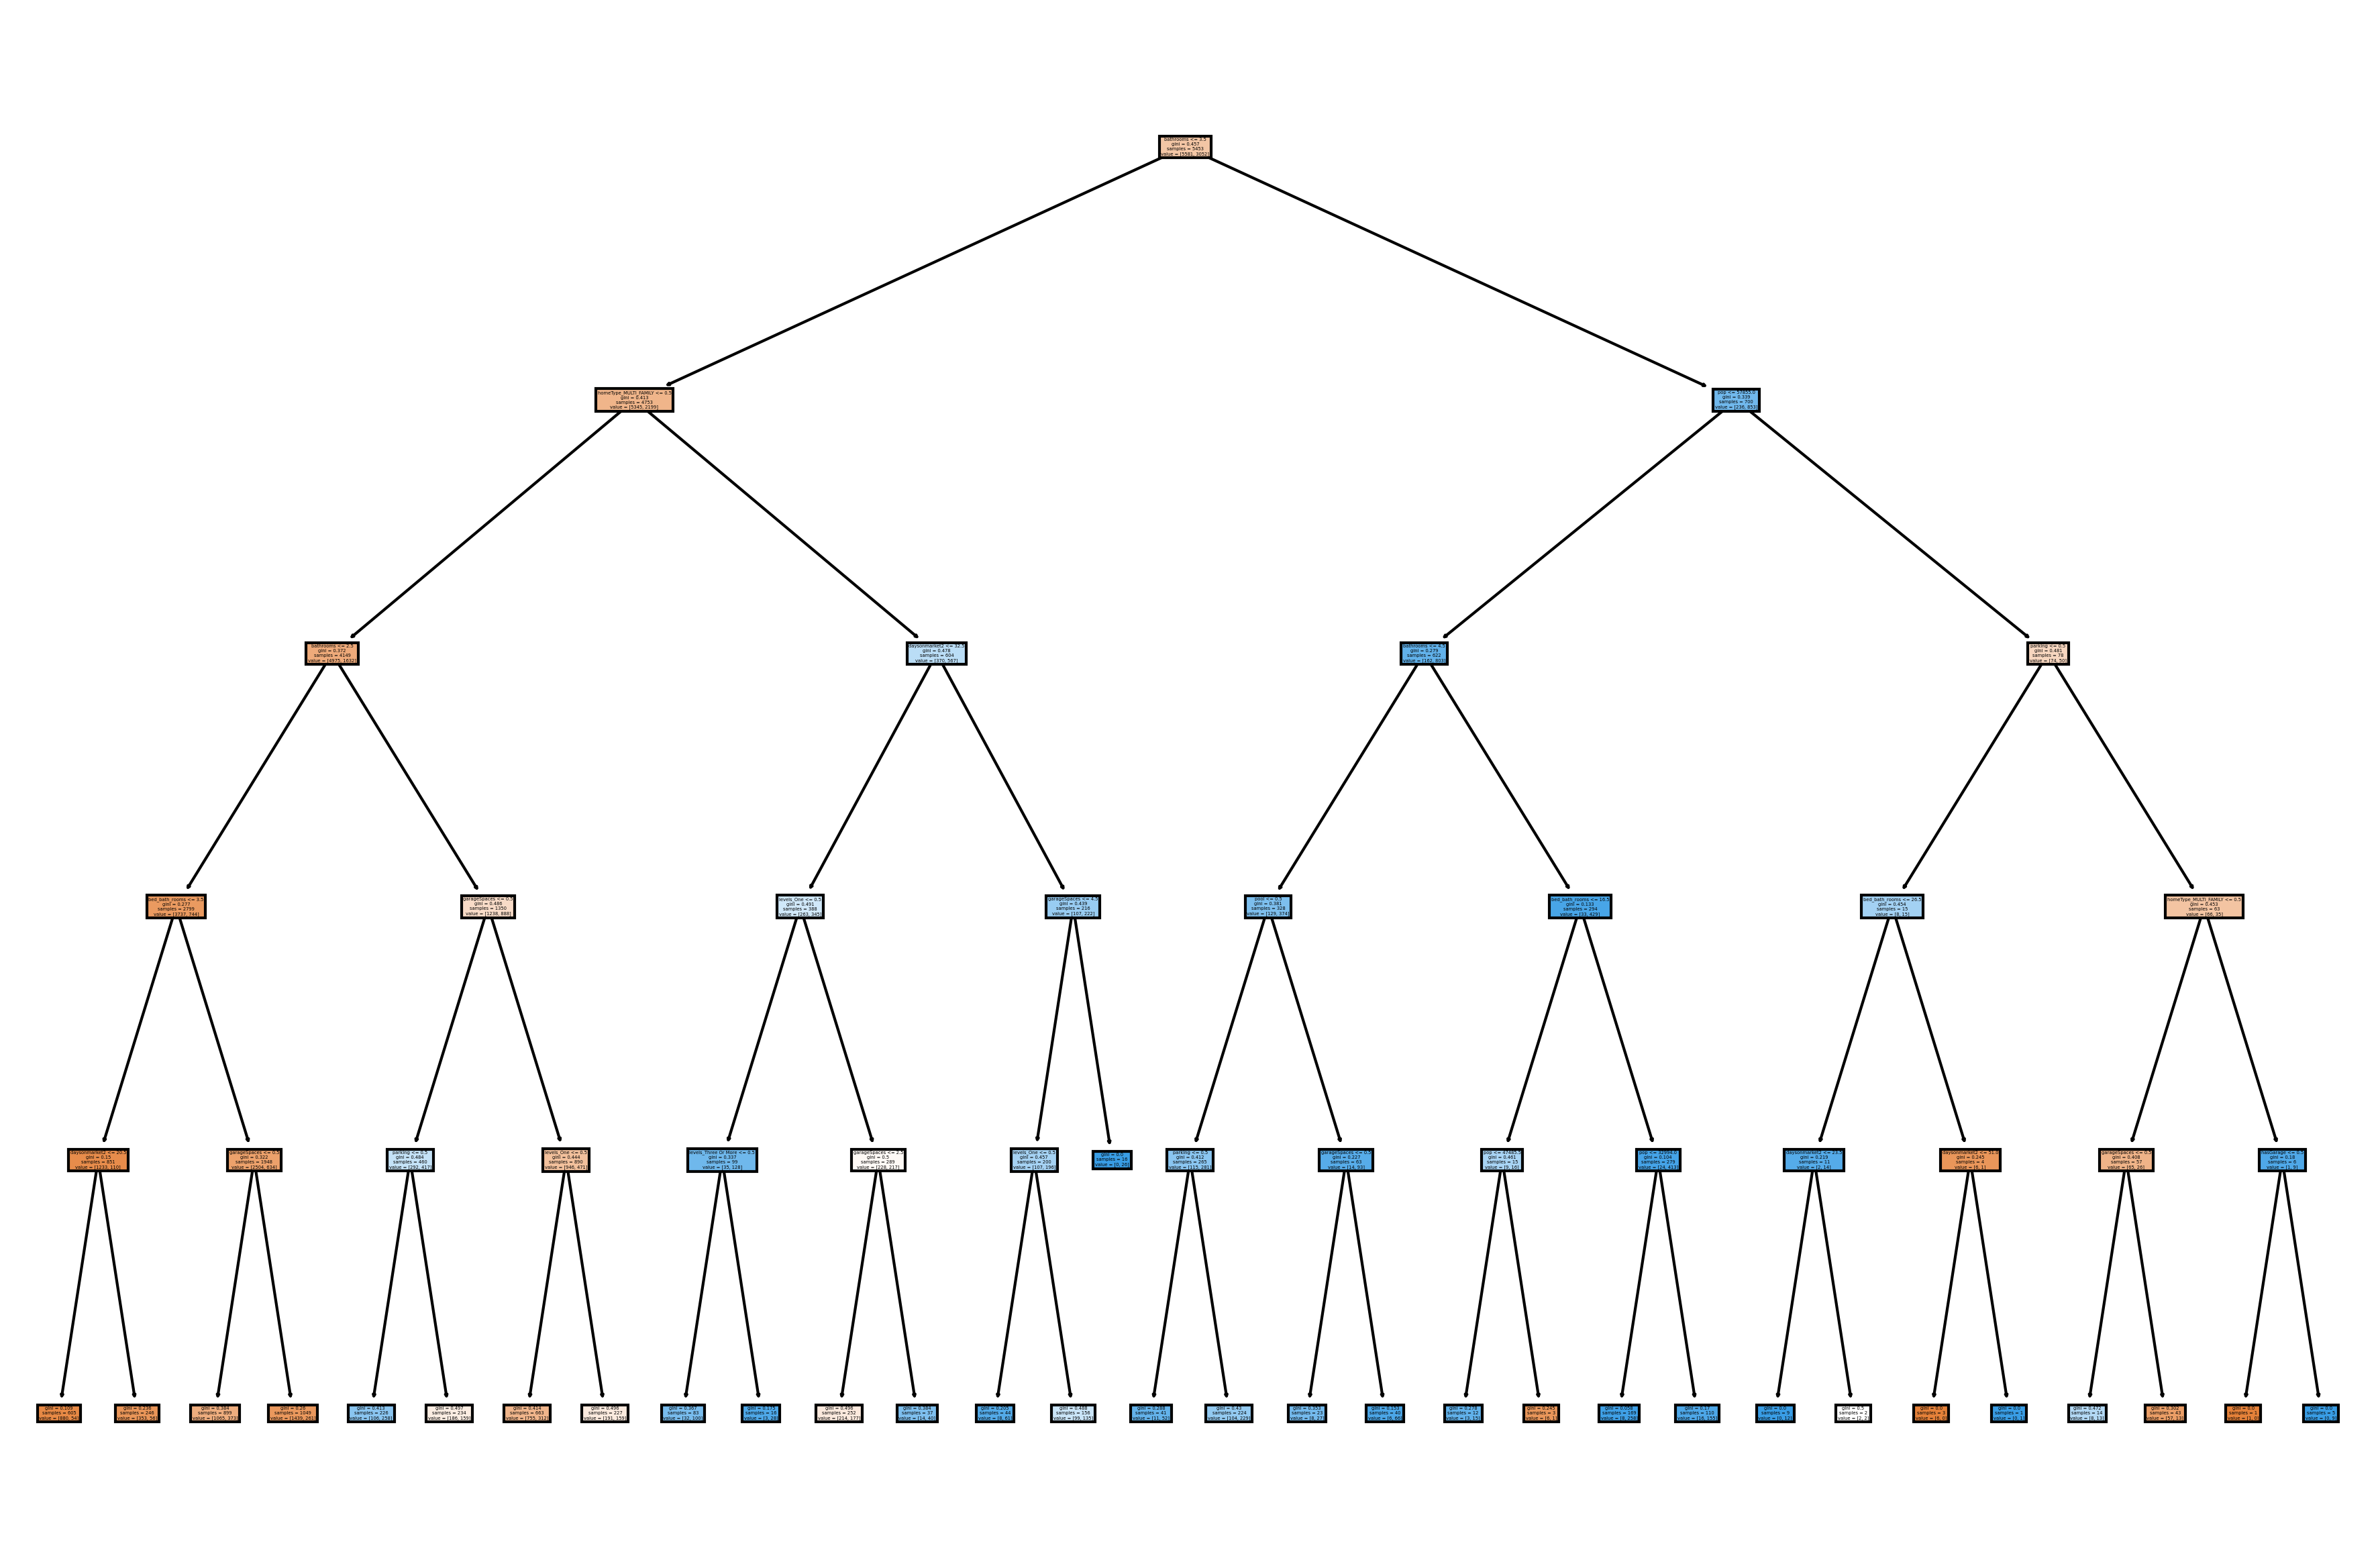

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10),dpi=300)
tree_dot = plot_tree(clf2.estimators_[0], feature_names = X1.columns.values, filled=True)

In [78]:
feature_names = ['bathrooms','pool','spa','parking','garageSpaces','hasPetsAllowed','hasGarage','daysonmarket2',
                	'homeType_CONDO',	'homeType_MULTI_FAMILY',	'homeType_SINGLE_FAMILY','bed_bath_rooms','levels_One', 'levels_Three Or More','Multi/Split', 'pop']
importances = clf2.feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
forest_importances

bathrooms                 0.406456
bed_bath_rooms            0.241573
pop                       0.128044
homeType_MULTI_FAMILY     0.086138
parking                   0.049347
garageSpaces              0.023579
levels_One                0.021418
daysonmarket2             0.011449
homeType_SINGLE_FAMILY    0.011278
homeType_CONDO            0.009064
hasGarage                 0.003929
levels_Three Or More      0.002441
hasPetsAllowed            0.002387
Multi/Split               0.001320
pool                      0.000970
spa                       0.000608
dtype: float64